# CSE 464 Machine Learning Coding Assignment

- Under the mentorship of **Dr. Pratik Chattopadhya**
  > In this Assignment, I designed a 3-layer Multilayer Perceptron (Input, Hidden and Output) classified and trained it on **_Wine Quality Dataset_** taken from **_UCI ML Repository_**.
- by **Pranav Gupta**, **_17045067_**

### Importing Libraries

> In this assignment I used important ML libraries such as **numpy**,**pandas**, and used framework **sklearn**.

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

### Loading Dataset

> The dataset is loaded from UCI Repository and the name of the dataset is **_winequality dataset_**.
> We can see from the the information of the dataset, that It contains **12 columns and 1599 rows**. The number of features are 11 and the ylabel is a quality index from 3-8.
> Ref to the dataset - <https://archive.ics.uci.edu/ml/datasets/wine+quality>

In [3]:
#importing dataset and preprocessing it
df=pd.read_csv('./data/winequality-red.csv',sep=";")
print(df.info())
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [3]:
all_features = list(df)
all_features
target = ['quality']
features = list(set(all_features)-set(target))

In [4]:
X=df.drop(target,axis=1)
y = df.loc[:,'quality']

print ("shape of X Ndarray :"+str(X.shape)+"\n"+"Shape of Y array: "+str(y.shape))

print("\nDescription of target label :-\n")
print(y.describe())
ss=StandardScaler()
X=ss.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


shape of X Ndarray :(1599, 11)
Shape of Y array: (1599,)

Description of target label :-

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64


### Designing MLP Perceptron

> As given in the assignment, I have initialised pre determined random set of hyperparameters, which will be used to create model. For each tuple, I have trained the model with random initialization and have observed the cross validation accuracy.
> **I have used 3-fold Cross-validation algorithm.**

In [5]:
#MLP=MultiLayerPerceptron
#initializing parameters alpha(a) and hidden layer neurons(n)
param_tuples=[(0.0001,1),(0.0001,2),(0.001,5),(0.0001,3),(0.0001,4),(0.001,5),(0.01,6),(0.003,5),(0.1,7),(0.001,12)]

def getAccuraciesList(param_tuples):
    accuracies_list=[]
    for parameter in param_tuples:
        a=parameter[0]
        n=parameter[1]
        accuracy_list=[]
        for i in range(20):
            clf=MLPClassifier(hidden_layer_sizes=(n,),solver='lbfgs',learning_rate_init=a,random_state=i,tol=1e-5,verbose=False)
            accuracies=cross_val_score(estimator=clf,X=X_train,y=y_train,cv=3)
            accuracy_list.append(accuracies.mean())
        accuracies_list.append(accuracy_list)
    return accuracies_list
%time accuracies_list = getAccuraciesList(param_tuples)

Wall time: 1min 12s


### Plotting Box Plot

> We have created 10 MLP Models with 20 random intialization for each model. This list is further used to plot box plot. And using this box plot we can visualize the accuracy of each model and can select the best model out of these parameters.
> From the box plot we can see that our **First model is giving great result** as the 1st box plot is consistent and mean is also higher than the rest.

the shape of the accuracy list obtained :(10, 20)


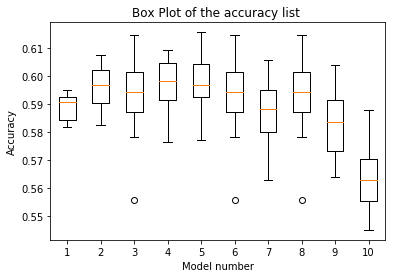

In [6]:
accuracies_list1 = np.array(accuracies_list)
print("the shape of the accuracy list obtained :"+ str(accuracies_list1.shape))
#Creating Box Plots
plt.boxplot(accuracies_list)
plt.xlabel("Model number")
plt.ylabel("Accuracy")
plt.title("Box Plot of the accuracy list ")
plt.show()

In [7]:
#choosing best (consistent and accurate i.e.1st tuple) set of parameters from box plot
best_param = param_tuples[0]
classifier=MLPClassifier(hidden_layer_sizes=(best_param[1],),solver='lbfgs',learning_rate_init=best_param[0],tol=1e-5)
classifier.fit(X_train,y_train)
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
print( "Best accuray : "+str(accuracies.mean()))

C:\Users\pranav\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Best accuray : 0.5980398099028746


### Drawing Cumulative Match Characteristics Curve

> CMC curve is a precision curve that provides detection or recognition precision for each rank. The horizontal line is rank of recognition, and the vertical line is precision percent. For example the first rank recognitions rate is indicated in first element, the second rank is indicated in second element and so on.

In [8]:
def sort(arr):
    dict1 = {}
    for i in range(len(arr)):
        dict1[i+3] = arr[i]
    sort_orders = sorted(dict1.items(),key=lambda x: x[1], reverse=True)
    ar = []
    for i in sort_orders:
        ar.append(i[0])
    return ar

# Gives CMC Scores based on the predictions probabilites and labels which can be used to draw CMC Curve
def CMCScore (predictions,labels):
    print("shape of the predictions :"+str(predictions.shape))
    print ("Shape of the len array :" +str(len(labels)))
    ranks = []
    for i in range(len(labels)) :
        firstOccurance = np.argmax(predictions[i]== labels[i])        
        ranks.append(firstOccurance+1)
    labelLen = len(labels)
    totallentillnow = 0
    cmcScore = []
    for i in range(1,predictions.shape[1]+1):
        totallentillnow += ranks.count(i)
        cmcScore.append(float(totallentillnow)/float(labelLen))
    return (cmcScore,range(1,predictions.shape[1]+1))

In [10]:
#drawing Cumulative Match Characteristics curve
best_param = param_tuples[0]
y_pred_proba=classifier.predict_proba(X_test)
predictions = np.empty((len(y_pred_proba),6))
labels = y_test.tolist()
predictions[0] = y_pred_proba[0]
for ind,arr in enumerate(y_pred_proba):
    predictions[ind] = sort(arr)

shape of the predictions :(480, 6)
Shape of the len array :480


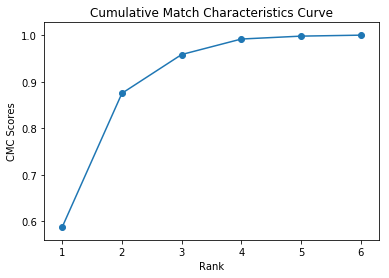

In [12]:
CMC_Rank = CMCScore(predictions, labels)
cmc_scores = CMC_Rank[0]
rank = CMC_Rank[1]
plt.plot(rank,cmc_scores)
plt.scatter(rank,cmc_scores)
plt.xlabel("Rank")
plt.ylabel("CMC Scores")
plt.title("Cumulative Match Characteristics Curve")
plt.show()

## Summary

> As we can see with increase in rank the cmc score increases. This was expected from reading the definition of cmc itself. Since the # of labels are 6, we can see that as we reach rank 6, our cmc score reaches 1
> But we can see that, **We get great Precision score at rank 2 itself.**